# Data processing

#### Import

In [1]:
import json

In [2]:
import h3

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
from matplotlib import pyplot

Merging pages

In [6]:
f = open("output/output.json")

In [7]:
data = json.load(f)

Create DataFrame

In [8]:
estates = data['_embedded']['estates']

In [9]:
df_estates = pd.DataFrame(columns=[
'id',
'name',
'locality_name',
'price_czk',
'price_raw',
'square',
'city',
'district',
'street',
'lat',
'lon'
])

In [10]:
i = int(-1) #Counter
for estate in estates:
    i += 1
    
    # Get square
    square = [int(s) for s in estates[int(i)]['name'].split() if s.isdigit()]
    # Get locality city, district, street
    locality = estates[int(i)]['seo']['locality']
    locality = locality.split('-')
    
    temp = {
        'id': estates[int(i)]['hash_id'],
        'name': estates[int(i)]['name'],
        'locality_name': estates[int(i)]['locality'],
        'price_czk': int(estates[int(i)]['price']),
        'price_raw': int(estates[int(i)]['price_czk']['value_raw']),
        'square': square[0],
        'city': str(locality[0]),
        'district': str(locality[1]),
        'street': str(locality[2]),
        'lat': float(estates[int(i)]['gps']['lat']),
        'lon': float(estates[int(i)]['gps']['lon'])
    }
    df_estates.loc[len(df_estates)] = temp
    
    if i == "21":
        break

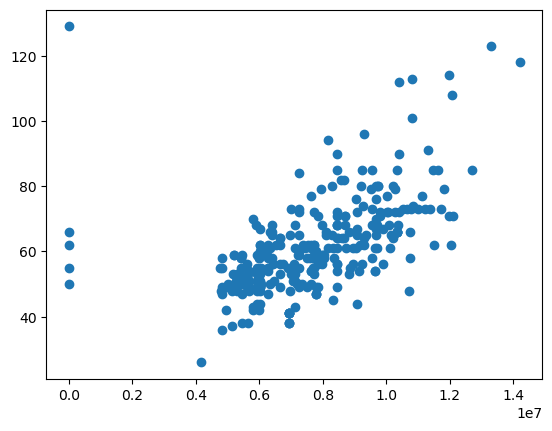

In [11]:
pyplot.scatter(df_estates['price_raw'], df_estates['square'])
pyplot.show()

In [12]:
df_estates.shape

(301, 11)

In [13]:
df_estates

,id,name,locality_name,price_czk,price_raw,square,city,district,street,lat,lon
0,546752332,Prodej bytu 1+kk 41 m²,Praha 4 - Nusle,6931000,6931000,41,praha,nusle,belehradska,50.053007,14.449939
1,3492820812,Prodej bytu 2+kk 76 m²,Praha 4 - Modřany,9052000,9052000,76,praha,modrany,piskarska,50.001112,14.413055
2,247371596,Prodej bytu 2+kk 55 m²,Praha 4 - Modřany,5922000,5922000,55,praha,modrany,levskeho,49.996889,14.442091
3,3595712332,Prodej bytu 2+kk 73 m²,Praha 4 - Nusle,7239000,7239000,73,praha,nusle,sdruzeni,50.043985,14.456269
4,4209129292,Prodej bytu 2+kk 71 m²,Praha 4 - Nusle,8459000,8459000,71,praha,nusle,5,50.048815,14.443267
...,...,...,...,...,...,...,...,...,...,...,...
296,3442608476,Prodej bytu 2+kk 85 m²,Praha 4 - Modřany,12690000,12690000,85,praha,modrany,k,49.988115,14.418654
297,941750620,Prodej bytu 2+kk 65 m²,Praha 4 - Michle,6949000,6949000,65,praha,michle,u,50.042948,14.466633
298,1546532956,Prodej bytu 2+kk 64 m²,Praha 4 - Háje,8679000,8679000,64,praha,haje,stichova,50.020670,14.552052
299,2862979164,Prodej bytu 2+kk 53 m²,Praha 4 - Háje,8808000,8808000,53,praha,haje,stichova,50.020670,14.552052


In [14]:
df_estates.to_json('properties.json')

In [15]:
geojson = {
    "type": "FeatureCollection",
    "features": [
    {
        "type": "Feature",
        "geometry" : {
            "type": "Point",
            "coordinates": [df_estates['lon'], df_estates['lat']],
            },
        "properties" : {
            "id": "",
            "price": "",
        },
     }]
}

geojson['properties'] = df_estates['id']

In [16]:
from geojson import Feature, FeatureCollection, Point


In [21]:
from pandas_geojson import to_geojson

In [24]:
geo_json = to_geojson(df=df_estates, lat='lat', lon='lon',
                 properties=['id','name','locality_name', 'price_czk', 'square'])

In [26]:
with open('file.geojson', 'w', encoding='utf-8') as f:
    json.dump(geo_json, f, ensure_ascii=False)